# Data Analysis on a WhatsApp Group Chat

## *Overview*
- Introduction
- Data collection and preporccessing 
- EDA
- Data Visualization and Understanding
- Summarizing the Inferences
- Conclusion

# Description:

#### This project aims to analyze the dynamics and patterns within a WhatsApp group chat using statistical methods and data visualization techniques. By delving into the conversations, participant interactions, and message content, we seek to uncover insights regarding communication patterns, engagement levels, and thematic trends within the group.

## *The project will involve several key components:*

- Data Collection: Gathering the chat data from the WhatsApp group, including message text, timestamps, participant details, and media shared.

- Data Preprocessing: Cleaning and preparing the data for analysis, including handling missing values, removing duplicates, and parsing message content.

- Statistical Analysis: Conducting statistical analyses to explore various aspects of the group chat, such as message frequency, participant engagement, sentiment analysis, and temporal patterns.

- Data Visualization: Creating visualizations to represent the findings effectively, including plots, charts, word clouds, and network graphs. Visualization techniques will be employed to present insights in a clear and intuitive manner.

- Interpretation and Insights: Deriving meaningful insights from the analysis results, including identifying prominent themes, influential participants, communication dynamics, and patterns of engagement.

- Conclusion and Recommendations: Summarizing the findings of the analysis and providing recommendations for improving communication dynamics or enhancing group interaction based on the insights gained.

#### By undertaking this project, we aim to gain a deeper understanding of the dynamics within WhatsApp group chats and explore how data analysis techniques can reveal valuable insights into group communication patterns and behavior.

In [ ]:
# Version Check

In [68]:
print("Python ", end="")
!python --version
print("Pandas ", pd.__version__)
print("matplotlib ", matplotlib.__version__)
print("seaborn ", sns.__version__)

Python Python 3.8.5
Pandas  2.0.3
matplotlib  3.3.2
seaborn  0.11.0


# Importing Required dependency

In [1]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import emoji
import itertools 
from collections import Counter
import warnings
from collections import Counter
import re


%matplotlib inline
warnings.filterwarnings('ignore')
from collections import Counter

C:\Users\670258672\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Data Extraction, Preparation, and Formating

In [2]:
def chatToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [3]:
df = chatToDf("whatsapp-chat-data.txt", '12hr')
df

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


# Basic Descriptive analysis of data

### List of active user in group

In [4]:
df['user'].unique()

array(['group_notification', '+91 96536 93868',
       'Dheeraj Lalwani (TSEC, CS)', '+91 99201 75875', '+91 95949 08570',
       '+91 79778 76844', '+91 90499 38860', 'Tanay Kamath (TSEC, CS)',
       'Saket (TSEC, CS)', '+91 77568 95072', 'Rohit Pathak (TSEC, CS)',
       '+91 75078 05454', 'Darshan Rander (TSEC, IT)', '+91 79774 68083',
       '+91 70394 60876', '+91 96191 55044', '+91 90678 93300',
       'Mohit Varma (TSEC, CS)', '+91 79770 56210',
       'Chirag Sharma (TSEC, CS)', 'Vivek Iyer (TSEC, Biomed)',
       'Tushar Nankani', '+91 81696 22410', '+91 89764 07509',
       '+91 78758 66747', 'Ankit (TSEC, CS)', '+91 86556 33169',
       '+91 76663 28147', '+91 88284 70904', '+91 97698 67348',
       'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)', '+91 91680 38866',
       'Pranay Thakur (TSEC, CS)', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+9

In [5]:
# number of active user in group
print("Number of active user in the group are = ",  len(df['user'].unique()))

Number of active user in the group are =  155


In [6]:
# Number of conversation that has take place is 13, 655
len(df)

13655

In [7]:
# Checking formate of date 
df.info() # date is in datetime formate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


## Null Values or Nill Message 

In [8]:
df.isnull().sum() # No Null values but there can be possibilites of nill string  

date_time    0
user         0
message      0
dtype: int64

In [9]:
# fetching null string as message
df[df['message']=='']

,date_time,user,message
277,2020-01-28 19:17:00,"Tanay Kamath (TSEC, CS)",
282,2020-01-28 19:22:00,"Tanay Kamath (TSEC, CS)",
292,2020-01-28 19:25:00,"Saket (TSEC, CS)",
330,2020-01-29 19:31:00,"Tanay Kamath (TSEC, CS)",
477,2020-02-01 09:48:00,+91 96536 93868,
...,...,...,...
13160,2020-09-27 14:35:00,"Dheeraj Lalwani (TSEC, CS)",
13283,2020-09-28 18:04:00,"Tanay Kamath (TSEC, CS)",
13360,2020-09-29 18:43:00,"Harsh Kapadia (TSEC IT, SE)",
13466,2020-09-30 20:21:00,"Tanay Kamath (TSEC, CS)",


#### counting All null string in messages 

In [10]:
print("Number of null messages in group chat ", len(df[df['message']=='']))

Number of null messages in group chat  538


<AxesSubplot:>

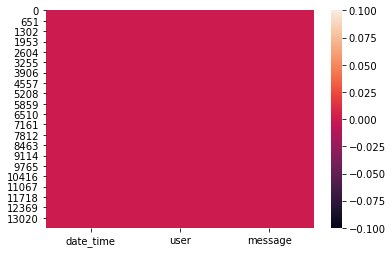

In [11]:
#Plot to check any null value
sns.heatmap(df.isnull())

# Doing Feature Engineering to create usefull features 

In [12]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
 3   day        13655 non-null  object        
 4   month      13655 non-null  object        
 5   year       13655 non-null  int32         
 6   date       13655 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 693.5+ KB


In [14]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


## Message frequency distribution over various time period

## Monthly level

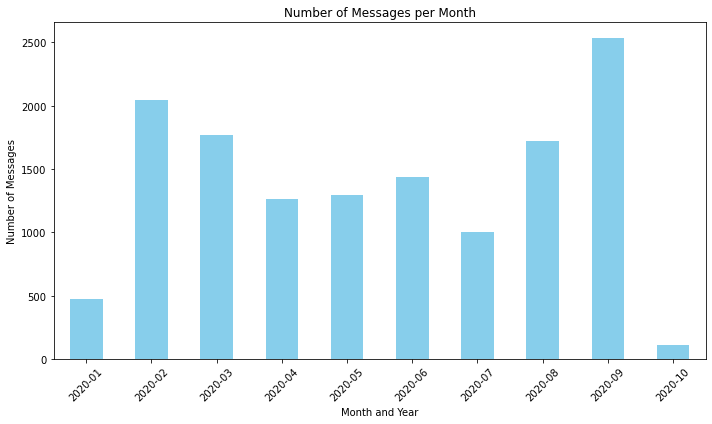

In [15]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract month and year from the 'date_time' column
df['month_year'] = df['date_time'].dt.to_period('M')

# Calculate the number of messages per month and year
messages_per_month_year = df.groupby('month_year').size()

# Plotting the frequency chart
plt.figure(figsize=(10, 6))
messages_per_month_year.plot(kind='bar', color='skyblue')
plt.title('Number of Messages per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Daily level distribution

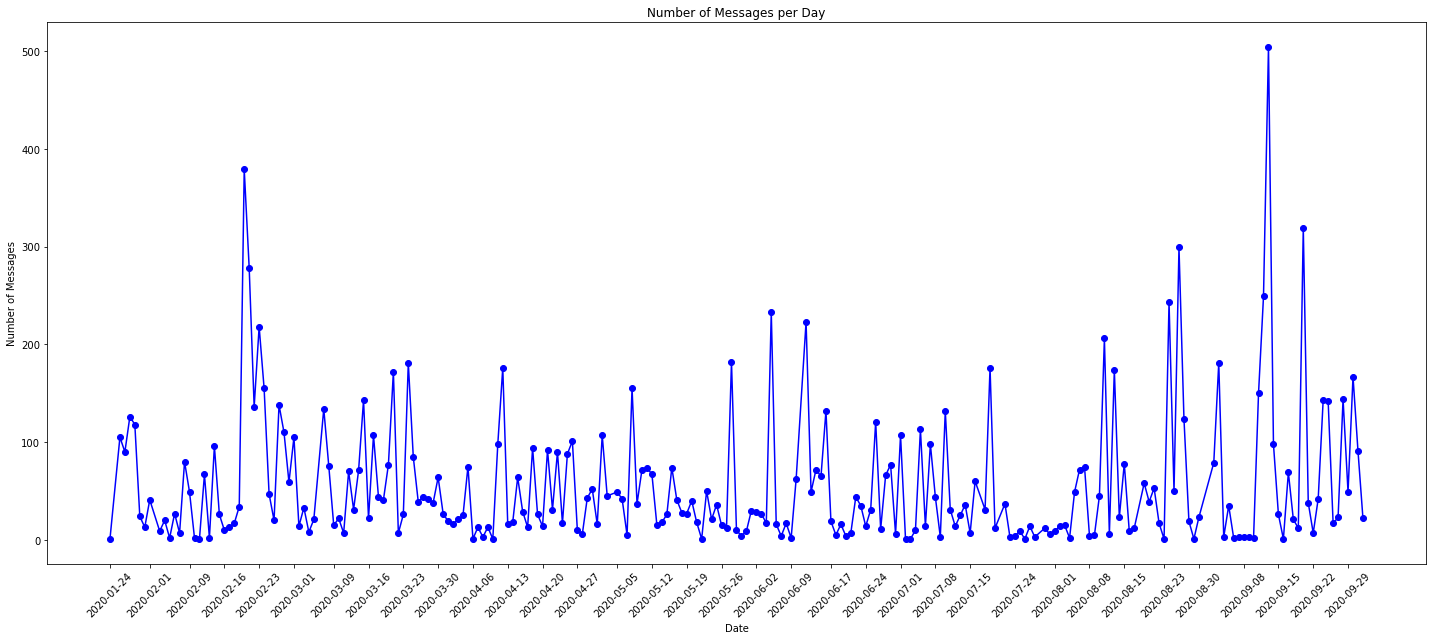

In [16]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Group the DataFrame by day and calculate the number of messages per day
messages_per_day = df.groupby(df['date_time'].dt.date).size()

# Plotting the frequency chart
plt.figure(figsize=(20, 9))
messages_per_day.plot(kind='line', color='blue', marker='o')
plt.title('Number of Messages per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks(messages_per_day.index[::7], rotation=45)  # Show every 7th date on x-axis
plt.tight_layout()
plt.show()

## Weekly level distribution

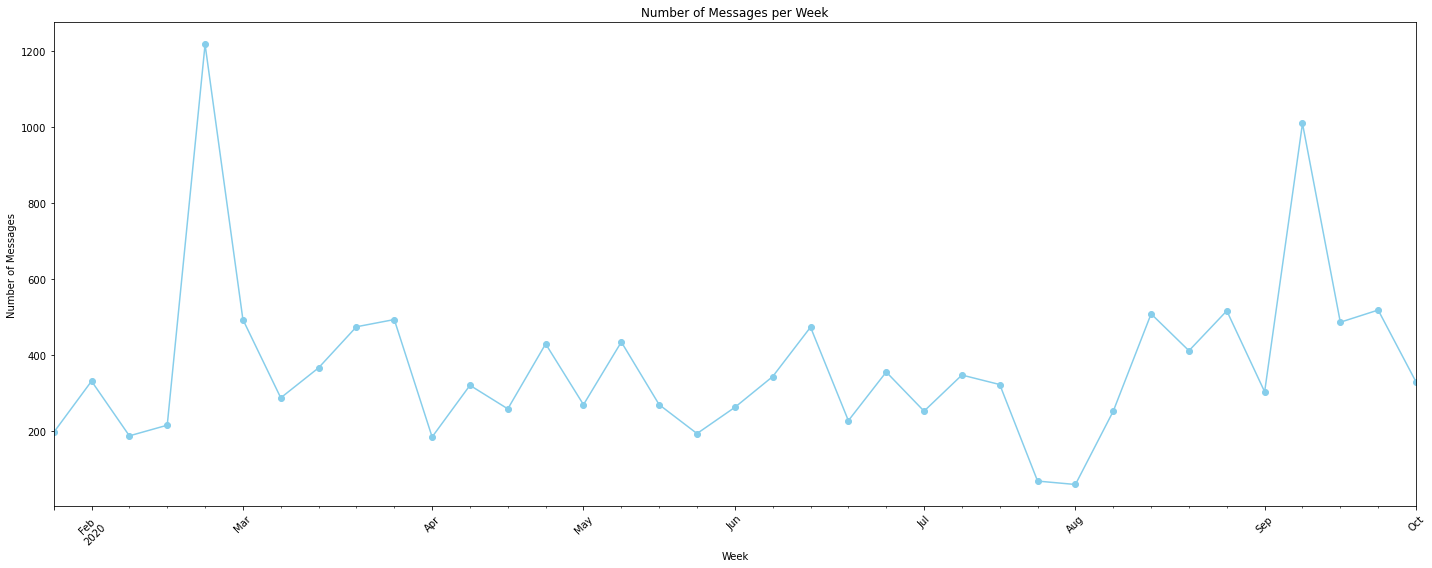

In [17]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Group the DataFrame by week and calculate the number of messages per week
messages_per_week = df.resample('W-Mon', on='date_time').size()

# Plotting the frequency chart
plt.figure(figsize=(20, 8))
messages_per_week.plot(kind='line', color='skyblue', marker='o')
plt.title('Number of Messages per Week')
plt.xlabel('Week')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Top Most Active weeks and there message count

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Group the DataFrame by week and calculate the number of messages per week
messages_per_week = df.resample('W-Mon', on='date_time').size()

# Filter out weeks with zero messages
#messages_per_week = messages_per_week[messages_per_week > 0]

In [19]:
messages_per_week.nlargest(10) # top 10 most active weeks

date_time
2020-02-24    1217
2020-09-14    1009
2020-09-28     518
2020-08-31     516
2020-08-17     508
2020-03-02     493
2020-03-30     493
2020-09-21     486
2020-03-23     474
2020-06-15     473
dtype: int64

## Least Active weeks and there message weeks 

In [20]:
messages_per_week.nsmallest(8)

date_time
2020-08-03     59
2020-07-27     68
2020-04-06    184
2020-02-10    187
2020-05-25    193
2020-01-27    196
2020-02-17    215
2020-06-22    227
dtype: int64

## Top 10 most Active Days

In [21]:
temp = df.groupby(df['date_time'].dt.date).size()
temp.nlargest(10)
# List of to 10 most active day for the whatsapp group

date_time
2020-09-13    504
2020-02-20    379
2020-09-20    319
2020-08-26    299
2020-02-21    278
2020-09-12    249
2020-08-24    243
2020-06-05    233
2020-06-12    223
2020-02-23    218
dtype: int64

## Least active days and there message count

In [22]:
temp.nsmallest(20)

date_time
2020-01-24    1
2020-02-11    1
2020-04-06    1
2020-04-10    1
2020-05-22    1
2020-07-02    1
2020-07-03    1
2020-07-26    1
2020-08-23    1
2020-08-29    1
2020-09-16    1
2020-02-05    2
2020-02-10    2
2020-02-13    2
2020-06-09    2
2020-08-04    2
2020-09-06    2
2020-09-10    2
2020-04-08    3
2020-07-09    3
dtype: int64

# Top 10 active users on the group.

### Before, analysing that, we will see the *number of Ghosts* in the group.

In [23]:
# Total number of people who have sent at least one message on the group;
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"

print(f"Number of people who haven't sent even a single message on the group are {237 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 154
Number of people who haven't sent even a single message on the group are 81


### *Result*
- Total number of people who have sent at least one message on the group are **154**.
- BUT, the total number of participants were **237**.
- **That means 81 people in the group have not sent even a single message throughout these 9 months and 13500+ messages.**

## Top 10 Active user in group

In [24]:
temp_df = df.copy()    
temp_df = temp_df[temp_df.user != "group_notification"]
topdf = temp_df.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
topdf = topdf.head(10).reset_index()
topdf

,user,message
0,"Tanay Kamath (TSEC, CS)",2528
1,"Dheeraj Lalwani (TSEC, CS)",1937
2,"Darshan Rander (TSEC, IT)",1404
3,"Kartik Soneji (TSEC, CS)",841
4,"Harsh Kapadia (TSEC IT, SE)",790
5,"Pratik K (TSEC CS, SE)",781
6,"Saurav Upoor (TSEC CS, SE)",569
7,Tushar Nankani,354
8,+91 82916 21138,275
9,"Farhan Irani (TSEC IT, SE)",255


## Ploting Top 10 Active user {plotting in different ways}

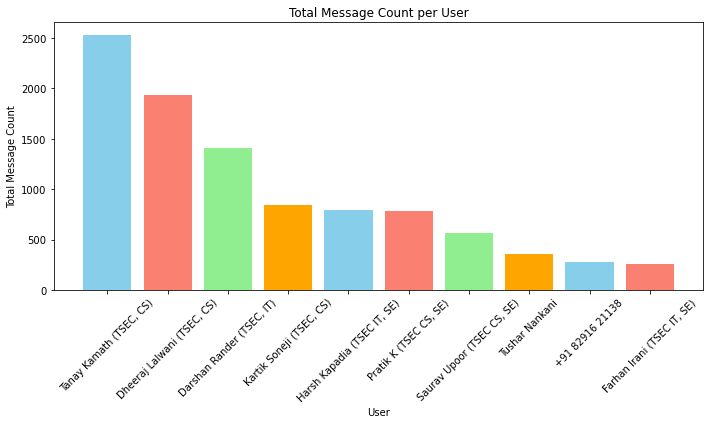

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(topdf['user'], topdf['message'], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Total Message Count per User')
plt.xlabel('User')
plt.ylabel('Total Message Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

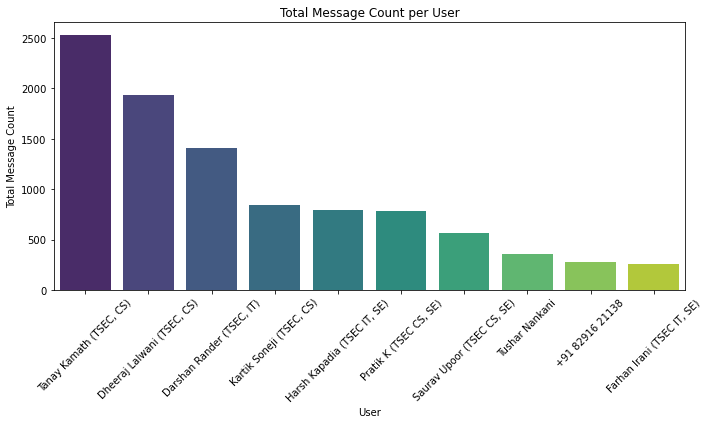

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='user', y='message', data=topdf, palette='viridis')
plt.title('Total Message Count per User')
plt.xlabel('User')
plt.ylabel('Total Message Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

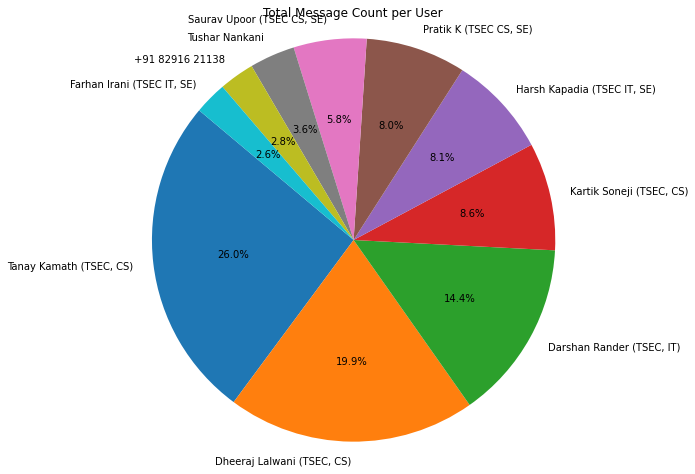

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(topdf['message'], labels=topdf['user'], autopct='%1.1f%%', startangle=140)
plt.title('Total Message Count per User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

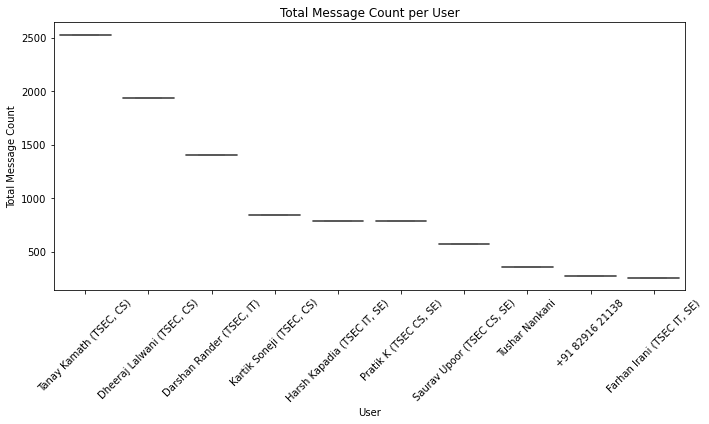

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user', y='message', data=topdf, palette='Set2')
plt.title('Total Message Count per User')
plt.xlabel('User')
plt.ylabel('Total Message Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Visualizing active user based on message length

In [29]:
user_message_count = df.groupby('user')['message'].count()

# Sort users based on message count in descending order and select top 10
top_10_users = user_message_count.sort_values(ascending=False).head(10)

# Calculate average message length for each of the top 10 users
average_message_length = []
for user in top_10_users.index:
    user_messages = df[df['user'] == user]['message']
    message_lengths = user_messages.str.len()
    average_message_length.append(message_lengths.mean())

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'User': top_10_users.index,
    'Total Message Count': top_10_users.values,
    'Average Message Length': average_message_length
})

In [30]:
result_df

,User,Total Message Count,Average Message Length
0,"Tanay Kamath (TSEC, CS)",2528,27.045491
1,"Dheeraj Lalwani (TSEC, CS)",1937,32.137842
2,"Darshan Rander (TSEC, IT)",1404,29.472222
3,"Kartik Soneji (TSEC, CS)",841,47.328181
4,"Harsh Kapadia (TSEC IT, SE)",790,33.134177
5,"Pratik K (TSEC CS, SE)",781,34.741357
6,"Saurav Upoor (TSEC CS, SE)",569,32.289982
7,Tushar Nankani,354,57.920904
8,group_notification,276,50.539855
9,+91 82916 21138,275,46.320000


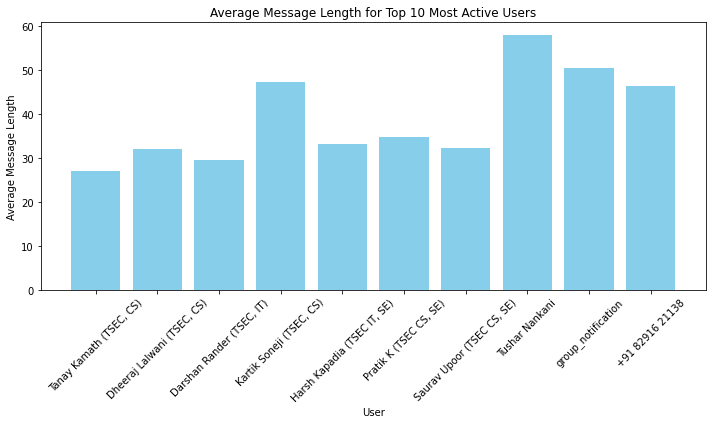

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(result_df['User'], result_df['Average Message Length'], color='skyblue')
plt.title('Average Message Length for Top 10 Most Active Users')
plt.xlabel('User')
plt.ylabel('Average Message Length')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

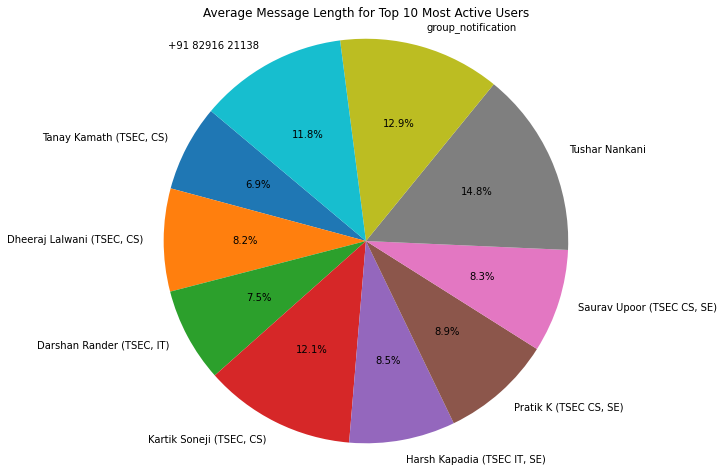

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(result_df['Average Message Length'], labels=result_df['User'], autopct='%1.1f%%', startangle=140)
plt.title('Average Message Length for Top 10 Most Active Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Findings
##### Tanay Kamath (TSEC, CS) person who has most number of message in the group has the least message lenght which means he sends broken messsages
##### At the same time Kartik Soneji (TSEC, CS) has less number of messages but a good message lenght which mean he send long and detailed messages

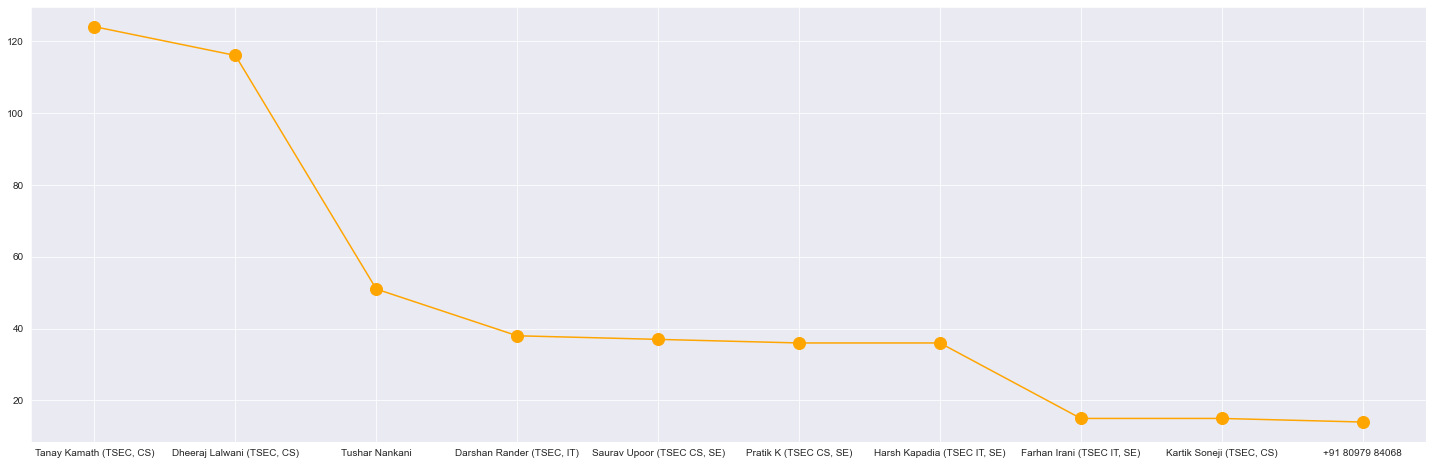

In [132]:
media_df = df[df.message == '<Media omitted> '][['user', 'message']]
media_df.reset_index(drop=True, inplace=True)
final_df = media_df.groupby('user').count().sort_values(by='message', ascending= False)
plt.figure(figsize=(25, 8))
plt.plot(final_df.head(10),marker = 'o', color = 'orange', markersize = 12)

# Top 10 users most sent media 

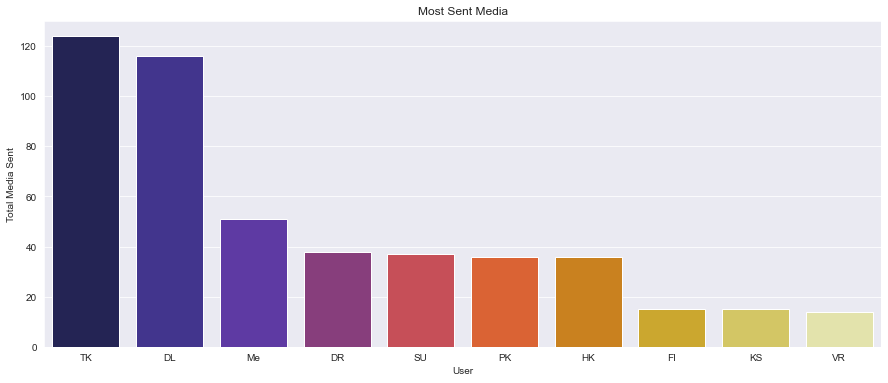

In [74]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.message == '<Media omitted> '].groupby('user').count().sort_values(by="message", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"message": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

top10media['initials'] = ''
for i in range(10):
    top10media.initials[i] = top10media.user[i].split()[0][0] + top10media.user[i].split()[1][0]

top10media.initials[2] = "Me"    # That's me
top10media.initials[9] = "VR"


# Increasing the figure size
plt.figure(figsize=(15, 6))

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting a bar graph;
sns.barplot(top10media.initials, top10media.media_sent, palette="CMRmap");

plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent');

# Saving the plots
plt.savefig('top10media.svg', format = 'svg')

# Most frquently used emoji in the group

In [36]:
from collections import Counter
import regex as re

ctr = Counter()
emoji_pattern = re.compile(r'[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639\U00002665\U00002666\U0000267B\U0000267F\U000026A0\U000026A1\U000026BD\U000026BE\U000026C4\U000026C5\U000026CE\U000026CF\U000026D1\U000026D3\U000026D4\U000026E9\U000026F0\U000026F1\U000026F2\U000026F3\U000026F4\U000026F5\U000026F7\U000026F8\U000026F9\U000026FA\U000026FD\U0001F680\U0001F692\U0001F6EB\U0001F6F5\U0001F6A3\U0001F6A6\U0001F6B4\U0001F6B5\U0001F6C0\U0001F6CC\U0001F6D1\U0001F6D2\U0001F6D5\U0001F6D6\U0001F6D7\U0001F6E3\U0001F6E4\U0001F6E5\U0001F6F0\U0001F6F3\U0001F6E0\U0001F6E1\U0001F6EA\U0001F6F4\U0001F6F6\U0001F6F7\U0001F6CF\U0001F6CB\U0001F6BD\U0001F6BF\U0001F6C1\U0001F6C2\U0001F6E2\U0001F6D0\U0001F6D4\U0001F6AB\U0001F6B0\U0001F6B9\U0001F6BA\U0001F6BB\U0001F6BC\U0001F6BE\U0001F6C3\U0001F6C4\U0001F6C5\U0001F6CB\U0001F6CC\U0001F6CD\U0001F6CE\U0001F6CF\U0001F6D3\U0001F6E9\U0001F6EB\U0001F6EC\U0001F6F3\U0001F6F4\U0001F6F6\U0001F6F7\U0001F6F8\U0001F6F9\U0001F6FA\U0001F6FB\U0001F6FC\U0001F6FD\U0001F6FE\U0001F6FF\U0001F910-\U0001F918\U0001F919\U0001F91A\U0001F91B\U0001F91C\U0001F91D\U0001F91E\U0001F91F\U0001F920-\U0001F927\U0001F928-\U0001F92F\U0001F930-\U0001F936\U0001F937-\U0001F93F\U0001F940-\U0001F945\U0001F946-\U0001F94C\U0001F94D-\U0001F94F\U0001F950-\U0001F95E\U0001F95F\U0001F960-\U0001F96B\U0001F96C-\U0001F970\U0001F971-\U0001F972\U0001F973-\U0001F976\U0001F977-\U0001F979\U0001F97A\U0001F97B-\U0001F97C\U0001F97D\U0001F97E-\U0001F97F\U0001F980-\U0001F981\U0001F982-\U0001F984\U0001F985-\U0001F991\U0001F992-\U0001F993\U0001F994-\U0001F995\U0001F996-\U0001F997\U0001F998-\U0001F9A2\U0001F9A5\U0001F9A6-\U0001F9A7\U0001F9A8\U0001F9A9\U0001F9AA\U0001F9AB\U0001F9AC\U0001F9AD\U0001F9AE\U0001F9AF\U0001F9B0\U0001F9B1\U0001F9B2\U0001F9B3\U0001F9B4\U0001F9B5\U0001F9B6\U0001F9B7\U0001F9B8\U0001F9B9\U0001F9BA\U0001F9BB\U0001F9BC\U0001F9BD\U0001F9BE\U0001F9BF\U0001F9C0\U0001F9C1\U0001F9C2\U0001F9C3\U0001F9C4\U0001F9C5\U0001F9C6\U0001F9C7\U0001F9C8\U0001F9C9\U0001F9CA\U0001F9CB\U0001F9CD\U0001F9CE\U0001F9CF\U0001F9D0\U0001F9D1\U0001F9D2\U0001F9D3\U0001F9D4\U0001F9D5\U0001F9D6\U0001F9D7\U0001F9D8\U0001F9D9\U0001F9DA\U0001F9DB\U0001F9DC\U0001F9DD\U0001F9DE\U0001F9DF\U0001F9E0\U0001F9E1\U0001F9E2\U0001F9E3\U0001F9E4\U0001F9E5\U0001F9E6\U0001F9E7\U0001F9E8\U0001F9E9\U0001F9EA\U0001F9EB\U0001F9EC\U0001F9ED\U0001F9EE\U0001F9EF\U0001F9F0\U0001F9F1\U0001F9F2\U0001F9F3\U0001F9F4\U0001F9F5\U0001F9F6\U0001F9F7\U0001F9F8\U0001F9F9\U0001F9FA\U0001F9FB\U0001F9FC\U0001F9FD\U0001F9FE\U0001F9FF]')
for idx, row in df.iterrows():
    emojis = emoji_pattern.findall(row["message"])
    for emoji_ in emojis:
        ctr[emoji_] += 1
# Get the most common emojis and their counts
most_common_emojis = ctr.most_common(10)
print("Top 10 Most Frequently Used Emojis:")
for emoji_, count in most_common_emojis:
    print(f"{emoji_}: {count} times")


Top 10 Most Frequently Used Emojis:
😂: 1886 times
👍: 364 times
🏻: 291 times
🔥: 244 times
😅: 220 times
💯: 180 times
🤦: 136 times
🤣: 128 times
👏: 101 times
🙏: 79 times


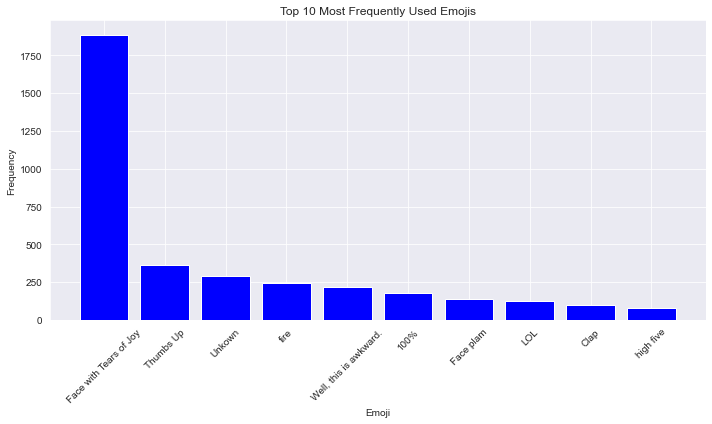

In [37]:
# Get the most common emojis and their counts
most_common_emojis = ctr.most_common(10)

# Extract emojis and counts for plotting
emojis = [emoji[0] for emoji in most_common_emojis]
counts = [emoji[1] for emoji in most_common_emojis]

# Map emoji characters to their descriptions
emoji_descriptions = {
    "😊": "Smiling Face with Smiling Eyes",
    "❤️": "Red Heart",
    "😂": "Face with Tears of Joy",
    "👍": "Thumbs Up",
    "😍": "Smiling Face with Heart-Eyes",
        '🏻': 'Unkown',
        '🔥': 'fire',
        '😅': 'Well, this is awkward.',
        '💯': '100%',
        '🤦': 'Face plam',
        '🤣': 'LOL',
        '👏': 'Clap',
        '🙏': 'high five',
    # Add more emoji descriptions as needed
}

# Convert emojis to their descriptions for labeling
emojis_labels = [emoji_descriptions.get(emoji, "Unknown") for emoji in emojis]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emojis_labels, counts, color='blue')
plt.title('Top 10 Most Frequently Used Emojis')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Most active days, most active hours, most active months.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_time   13655 non-null  datetime64[ns]
 1   user        13655 non-null  object        
 2   message     13655 non-null  object        
 3   day         13655 non-null  object        
 4   month       13655 non-null  object        
 5   year        13655 non-null  int32         
 6   date        13655 non-null  object        
 7   month_year  13655 non-null  period[M]     
dtypes: datetime64[ns](1), int32(1), object(5), period[M](1)
memory usage: 800.2+ KB


# Most Acitve Hour

In [39]:
df['hour'] = df['date_time'].dt.hour

# Count the occurrences of each hour
active_hours = df['hour'].value_counts()

# Find the most active hour
most_active_hour = active_hours.idxmax()

print("Most active hour:", most_active_hour)

Most active hour: 21


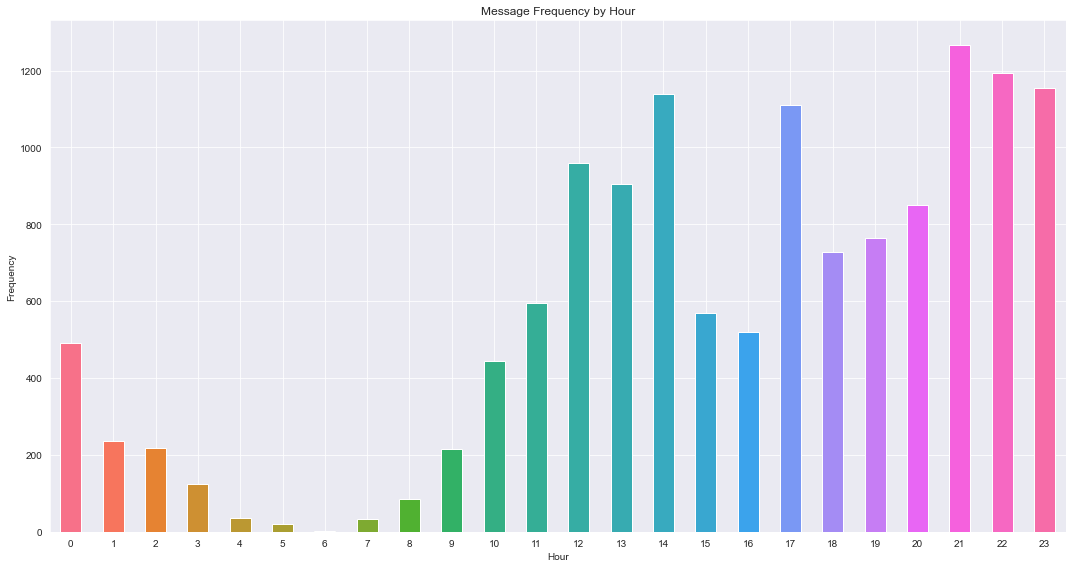

In [40]:
palette = sns.color_palette("husl", len(active_hours))

# Plotting the frequency of messages for each hour
plt.figure(figsize=(15, 8))
active_hours.sort_index().plot(kind='bar', color=palette)
plt.title('Message Frequency by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Most Active Day of the week 

In [41]:
df['day_of_week'] = df['date_time'].dt.day_name()

# Count the occurrences of each day of the week
active_days = df['day_of_week'].value_counts()

# Find the most active day of the week
most_active_day = active_days.idxmax()

print("Most active day of the week:", most_active_day)

Most active day of the week: Sunday


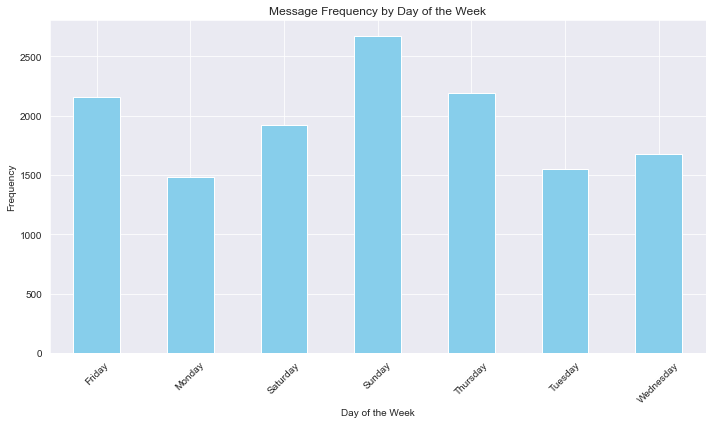

In [42]:
plt.figure(figsize=(10, 6))
active_days.sort_index().plot(kind='bar', color='skyblue')
plt.title('Message Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Most Active Month of the year

In [43]:
df['month'] = df['date_time'].dt.month

# Count the occurrences of each month
active_months = df['month'].value_counts()

# Find the most active month of the year
most_active_month = active_months.idxmax()

print("Most active month of the year:", most_active_month)

Most active month of the year: 9


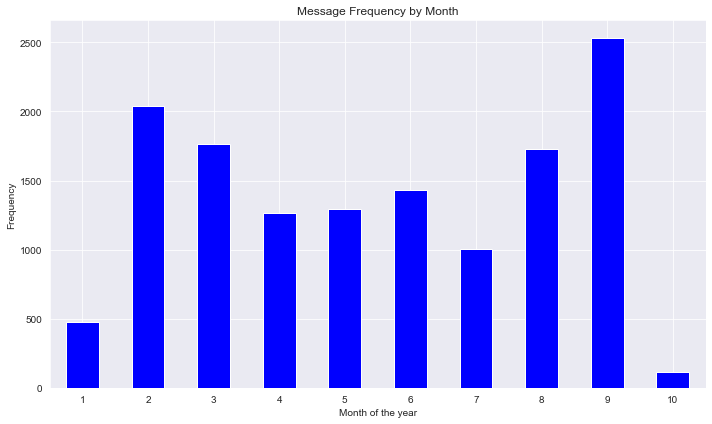

In [44]:

# Plotting the frequency of messages for each month of the year
plt.figure(figsize=(10, 6))
active_months.sort_index().plot(kind='bar', color='blue')
plt.title('Message Frequency by Month')
plt.xlabel('Month of the year')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [45]:
df['day_of_month'] = df['date_time'].dt.day

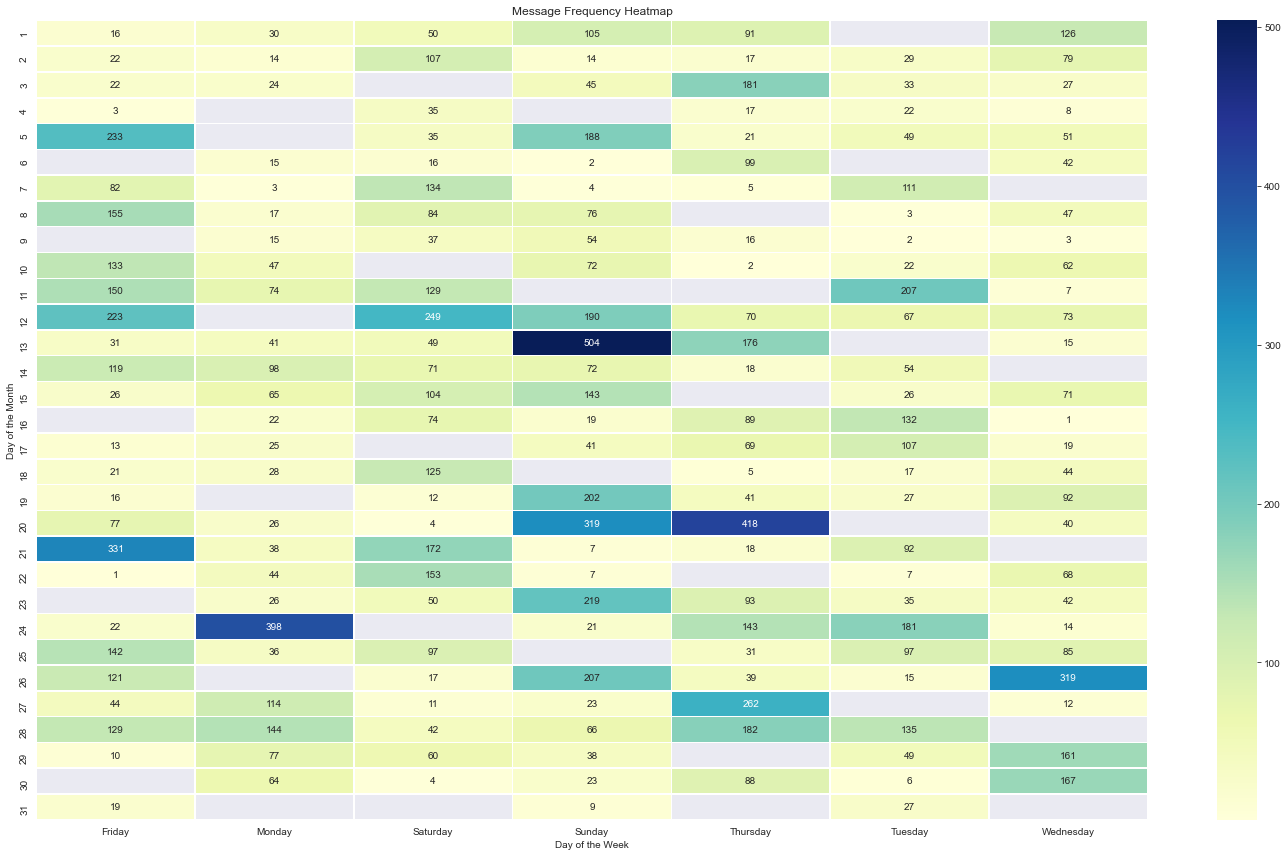

In [46]:
pivot_table = df.pivot_table(index='day_of_month', columns='day_of_week', values='month', aggfunc='count')
# Plotting the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Message Frequency Heatmap')
plt.xlabel('Day of the Week')
plt.ylabel('Day of the Month')
plt.tight_layout()
plt.show()

In [47]:
df

,date_time,user,message,day,month,year,date,month_year,hour,day_of_week,day_of_month
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,1,2020,2020-01-26,2020-01,16,Sunday,26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,1,2020,2020-01-24,2020-01,20,Friday,24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,1,2020,2020-01-26,2020-01,16,Sunday,26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,1,2020,2020-01-26,2020-01,16,Sunday,26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,1,2020,2020-01-26,2020-01,16,Sunday,26
...,...,...,...,...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,10,2020,2020-10-02,2020-10,2,Friday,2
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,10,2020,2020-10-02,2020-10,2,Friday,2
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,10,2020,2020-10-02,2020-10,2,Friday,2
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,10,2020,2020-10-02,2020-10,2,Friday,2


# Checking what are the common words that are used in group chat?

In [48]:

# Concatenate all messages into a single string
all_messages = ' '.join(df['message'])

# Define the set of additional stopwords to remove
additional_stopwords = set(['<Media','group','omitted>', '@', '#', '?', '%', '.', '+', '=', '}', '{','-', ';',  'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

# Define the regular expression pattern to match emojis and numbers
pattern = r'[\u203C-\U0001F9FF\d]+'

# Remove emojis and numbers from the text
all_messages = re.sub(pattern, '', all_messages)

# Tokenize the text into words
words = all_messages.split()

# Define the set of stopwords to remove
custom_stopwords = set(['the', 'and', 'to', 'in', 'of', 'for', 'a', 'is', 'that', 'it', 'on', 'with', 'was', 'as', 'at', 'be', 'are', 'this', 'you', 'i', 'we', 'have', 'not', 'from', 'but', 'they', 'or', 'an', 'so', 'can', 'if', 'your', 'what', 'there', 'will', 'when', 'who', 'how', 'which', 'where', 'why', 'then', 'than'])

# Combine custom stopwords and additional stopwords
all_stopwords = custom_stopwords.union(additional_stopwords)

# Count the frequency of each word
word_counts = Counter(words)

# Remove stopwords from the word counts
word_counts = {word: freq for word, freq in word_counts.items() if word.lower() not in all_stopwords}

# Sort the dictionary by word frequency in decreasing order
sorted_word_freq = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Extract the top 50 most used words
top_50_words = list(sorted_word_freq.items())[:50]

print("Top 50 most used words in decreasing order of occurrence:")
for word, freq in top_50_words:
    print(f"{word}: {freq}")

Top 50 most used words in decreasing order of occurrence:
<Media: 687
do: 250
all: 235
me: 207
like: 198
just: 195
my: 188
group's: 157
int: 154
has: 147
ka: 145
don't: 134
bhi: 134
Thanks: 129
get: 129
time: 129
by: 128
about: 124
good: 123
only: 122
any: 121
should: 120
some: 119
he: 116
u: 115
try: 113
No: 112
Oh: 112
too: 111
code: 110
think: 108
out: 108
need: 107
toh: 106
want: 104
nhi: 100
nahi: 98
tha: 97
na: 97
first: 96
ke: 96
no: 95
more: 95
used: 93
am: 93
Do: 91
Thank: 90
also: 89
its: 89
did: 89


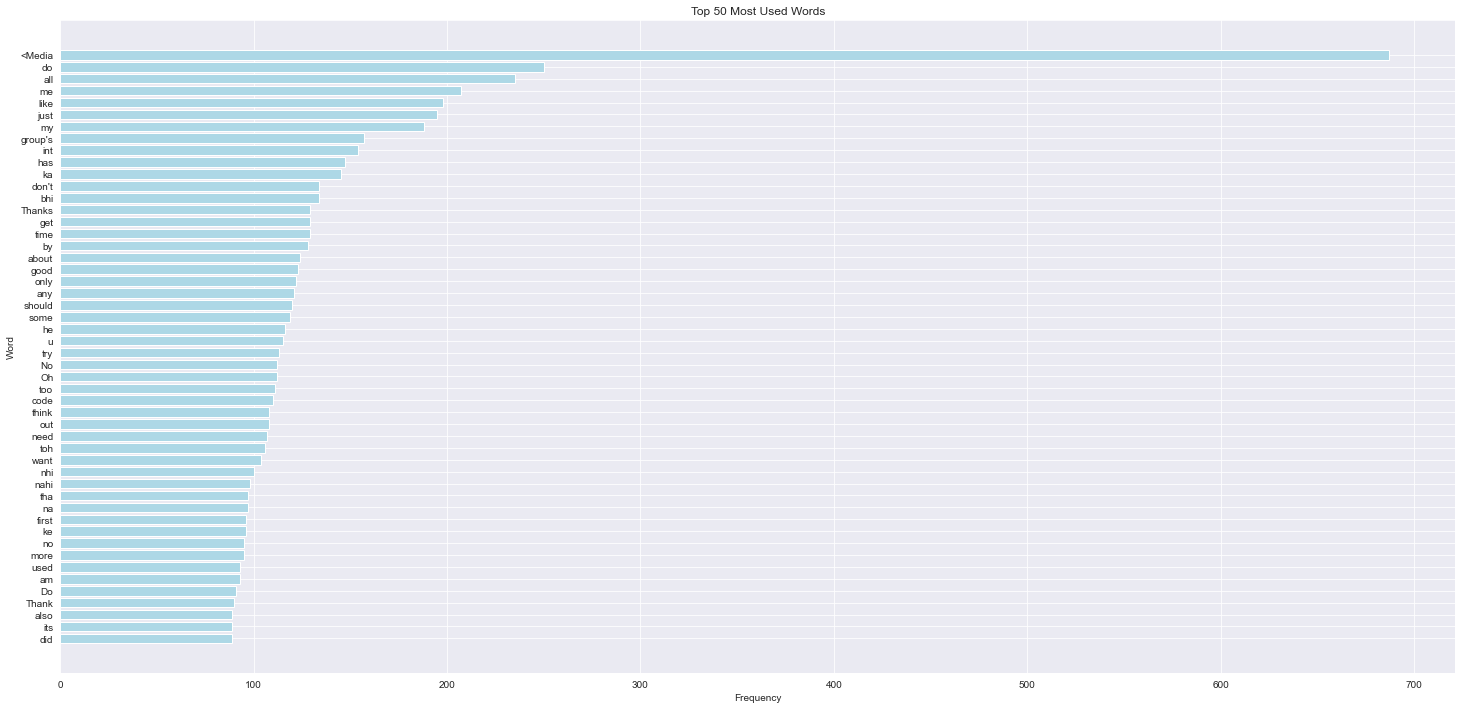

In [49]:
words, frequencies = zip(*top_50_words)

# Plot the words and their frequencies
plt.figure(figsize=(25, 12))
plt.barh(words, frequencies, color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 50 Most Used Words')
plt.gca().invert_yaxis()  # Invert y-axis to have most frequent words at the top
plt.show()

In [100]:
## Word Cloud 

stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

# Concatenate all messages into a single string
all_messages = ' '.join(df['message'])

# Create a WordCloud object with the specified stopwords
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_messages)

# Convert the WordCloud object to a dictionary of word frequencies
word_freq = wordcloud.words_

# Sort the dictionary by word frequency in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Extract the most active words (top N)
top_n = 10
most_active_words = list(sorted_word_freq.keys())[:top_n]

print("Top {} most active words:".format(top_n))
for word in most_active_words:
    print(word)



In [83]:
# # Concatenate all messages into a single string
# all_messages = ' '.join(df['message'])

# # Preprocess the text (remove punctuation and convert to lowercase)
# all_messages = all_messages.lower().replace('.', '').replace(',', '')

# # Tokenize the text into words
# words = all_messages.split()

# # Count the frequency of each word
# word_counts = Counter(words)

# # Filter out common words if desired (using a set for faster membership checking)
# common_words = set(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])
# # word_counts = {word: count for word, count in word_counts.items() if word not in common_words}

# # Plot the word cloud
# plt.figure(figsize=(10, 8))
# plt.barh(list(word_counts.keys()), list(word_counts.values()), color='skyblue')
# plt.xlabel('Frequency')
# plt.ylabel('Word')
# plt.title('Word Cloud of Messages')
# plt.gca().invert_yaxis()  # Invert y-axis to have most frequent words at the top
# plt.show()


# *Conclusion*

- The insights were really interesting to look at!

- We first loaded the data as a .txt file coverted it using `RawtoDF` function.
- Then  we added helper columns, manipulated datetime entries.
- Then, we started analysing our whatsapp data!

Here is what we looked at!

Overall frequency of total messages on the group.**

Top 10 most active days.**

Top 10 active users on the group (with a twist - Most active user had the least average message length ).**
- Ghosts present in the group. (shocking results - 80+ participants who haven't even sent a single message!)

Top 10 users most sent media.**
- *Tanay Kamath* beats everyone by a mile!

Top 10 most used emojis.**
- using the `emoji` module!

Most active hours and weekdays.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.
